In [1]:
import scanpy as sc
import h5py
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy as gp
import os

binsize = 50
savedir = f'/home/chrissy1/spatial/stomics/ovary_froz/redo/seurat/bin{binsize}_processed'
# os.chdir(savedir)
res_adata_path = f'{savedir}/SCT.h5ad'
adata = sc.read_h5ad(res_adata_path)


In [51]:
sc.tl.rank_genes_groups(adata, 'batch', method='wilcoxon', pts=True, use_raw=False)
markers = sc.get.rank_genes_groups_df(adata, group=None, pval_cutoff=0.05)
markers.to_csv('batch_markers.csv')

In [52]:
for ct in adata.obs['annot_no_marker'].unique():
    ad = adata[adata.obs.annot_no_marker==ct].copy()
    sc.tl.rank_genes_groups(ad, 'batch', method='wilcoxon', pts=True, use_raw=False)
    markers = sc.get.rank_genes_groups_df(ad, group=None, pval_cutoff=0.05)
    markers.to_csv(f'{ct}_markers.csv')

AttributeError: 'NoneType' object has no attribute 'set_fontsize'

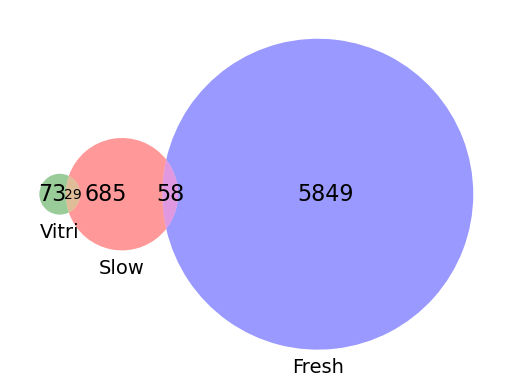

In [15]:
import pandas as pd
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
import os

os.chdir('/home/chrissy1/spatial/stomics/ovary_froz/redo/seurat/bin50_processed/deg')
df = pd.read_csv('batch_markers.csv')
df = df[(df['logfoldchanges'] > 0.25)&(df['pvals_adj']<0.05)]

# Assuming you have a DataFrame called 'df' with columns 'name' and 'group'
# 'name' column contains gene names and 'group' column contains group labels

# Group the DataFrame by the 'group' column and get the unique genes in each group
grouped_genes = df.groupby('group')['names'].unique()
groups = df['group'].unique()
# Create a Venn diagram based on the number of gene intersections
if len(grouped_genes) == 2:
    out = venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups, set_colors=('red', 'green'))
    for text in out.set_labels:
        text.set_fontsize(14)
    for text in out.subset_labels:
        text.set_fontsize(16)
elif len(grouped_genes) == 3:
    out = venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups, set_colors=('blue', 'red', 'green'))
    for text in out.set_labels:
        text.set_fontsize(14)
    for text in out.subset_labels:
        text.set_fontsize(16)

# Display the Venn diagram
plt.show()

Cell type: ST


/tmp/ipykernel_21059/2242307818.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups)


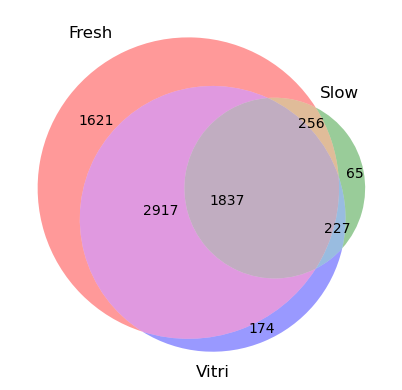

/tmp/ipykernel_21059/2242307818.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups)


Cell type: ST_SM


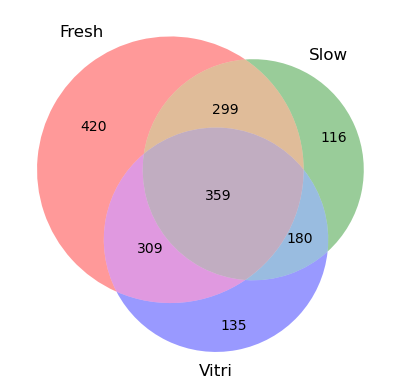

Cell type: ENDO_SM


/tmp/ipykernel_21059/2242307818.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups)


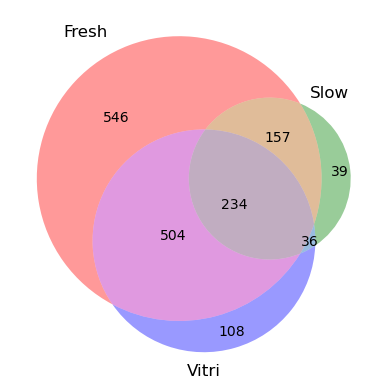

Cell type: FIB


/tmp/ipykernel_21059/2242307818.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups)


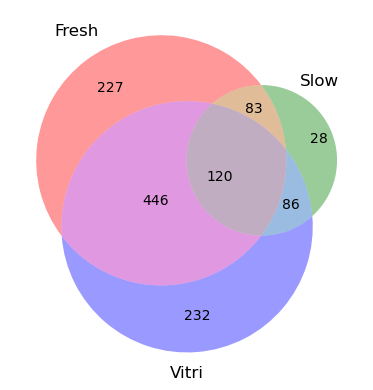

/tmp/ipykernel_21059/2242307818.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups)


Cell type: B_Plasma


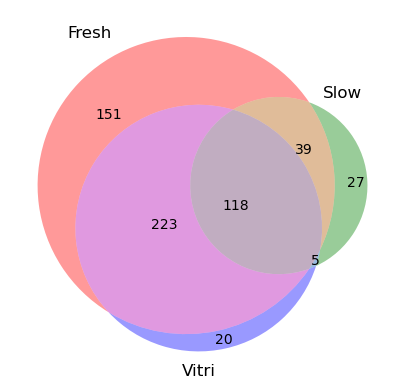

/tmp/ipykernel_21059/2242307818.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups)


Cell type: O


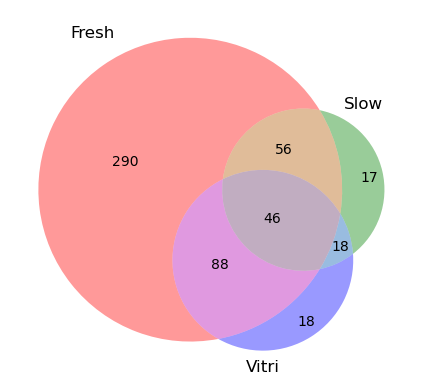

/tmp/ipykernel_21059/2242307818.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups)


Cell type: ST_LIP


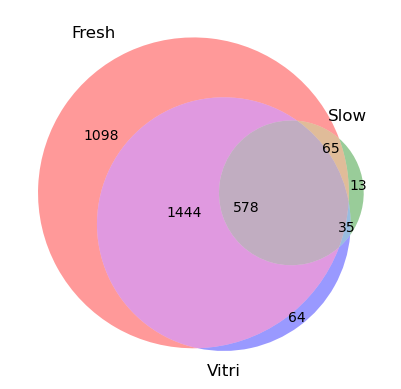

/tmp/ipykernel_21059/2242307818.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups)


Cell type: ERY_ENDO


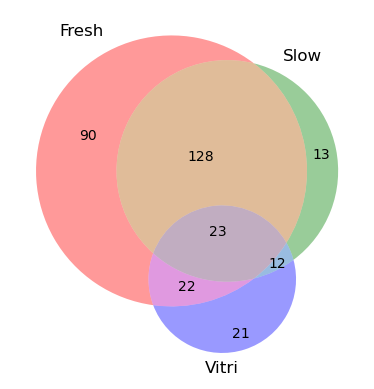

In [54]:
for ct in adata.obs['annot_no_marker'].unique():
    markers = pd.read_csv(f'{ct}_markers.csv')
    print('Cell type:', ct)
    df = df[(df['logfoldchanges'] > 0.25)&(df['pvals_adj']<0.05)]
    grouped_genes = markers.groupby('group')['names'].unique()
    groups = df['group'].unique()
    # Create a Venn diagram based on the number of gene intersections
    if len(grouped_genes) == 2:
        venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups)
    elif len(grouped_genes) == 3:
        venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups)
    # Display the Venn diagram
    plt.show()

## Reference Fresh

In [55]:
for ct in adata.obs['annot_no_marker'].unique():
    ad = adata[adata.obs.annot_no_marker==ct].copy()
    sc.tl.rank_genes_groups(ad, 'batch', method='wilcoxon', pts=True, reference='Fresh', use_raw=False)
    markers = sc.get.rank_genes_groups_df(ad, group=None, pval_cutoff=0.05)
    markers.to_csv(f'{ct}_markers_refFresh.csv')


In [2]:
for ref in ['Fresh', 'Slow', 'Vitri']:
    sc.tl.rank_genes_groups(adata, 'batch', method='wilcoxon', pts=True, reference=ref, use_raw=False)
    markers = sc.get.rank_genes_groups_df(adata, group=None, pval_cutoff=0.05)
    markers.to_csv(f'batch_markers_ref{ref}.csv')


In [15]:
adata.obs.columns[:30]

Index(['Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'X', 'batch',
       'x', 'y', 'z', 'in_tissue', 'sample', 'percent.mt', 'nCount_SCT',
       'nFeature_SCT', 'SCT_snn_res.1', 'seurat_clusters', 'PC_1', 'PC_2',
       'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10',
       'PC_11', 'PC_12', 'PC_13', 'PC_14'],
      dtype='object')

/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/seaborn/categ

test Fresh vs Slow 25.770181036869534 9.575776087110473e-147
test Fresh vs Vitri 42.872257793499095 0.0
test Slow vs Vitri 18.207602577614583 2.2459515461122493e-74
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Fresh vs. Slow: Mann-Whitney-Wilcoxon test two-sided, P_val:1.915e-146 U_stat=1.089e+09
Slow vs. Vitri: Mann-Whitney-Wilcoxon test two-sided, P_val:4.492e-74 U_stat=1.135e+09
Fresh vs. Vitri: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.169e+09


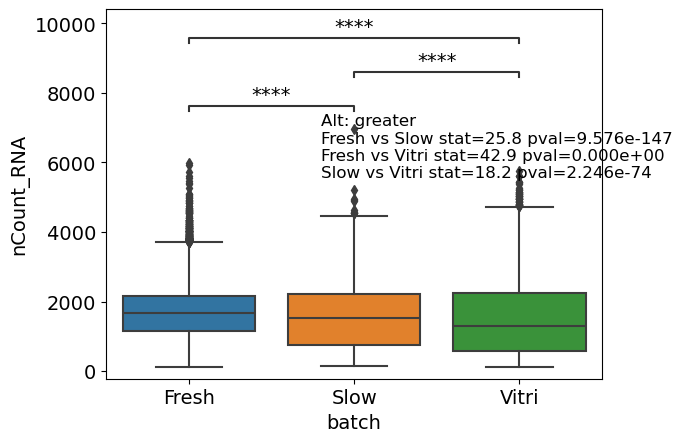

/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/seaborn/categ

test Fresh vs Slow 87.87026145549612 0.0
test Fresh vs Vitri 125.78200122978926 0.0
test Slow vs Vitri 49.82930905479564 0.0
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Fresh vs. Slow: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.327e+09
Slow vs. Vitri: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.263e+09
Fresh vs. Vitri: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.490e+09


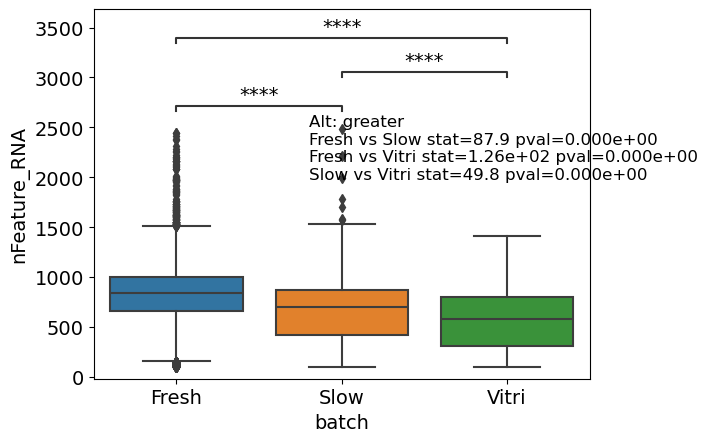

/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/seaborn/categ

test Fresh vs Slow -116.67964276254224 0.0
test Fresh vs Vitri -129.5324071415521 0.0
test Slow vs Vitri -14.884226404215546 2.086425372194061e-50
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Fresh vs. Slow: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=5.432e+08
Slow vs. Vitri: Mann-Whitney-Wilcoxon test two-sided, P_val:4.173e-50 U_stat=1.002e+09
Fresh vs. Vitri: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=5.015e+08


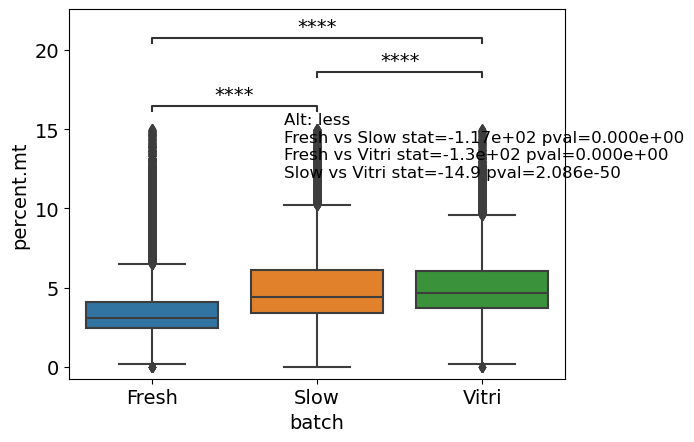

In [4]:
from scipy.stats import ranksums
import seaborn as sns
from statannotations.Annotator import Annotator
plt.rcParams['font.size'] = 14
data = adata.obs[['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'batch']]
x = 'batch'
direction = {
    'nCount_RNA': 'greater',
    'nFeature_RNA': 'greater',
    'percent.mt': 'less'
}
for y in data.columns[:3]:
    # y = 'percent.mt'
    order = ['Fresh', 'Slow', 'Vitri']
    direc = direction[y]
    # custom_test = StatTest(ranksums(alternative=['greater']))
    ax = sns.boxplot(data=data, x=x, y=y, order=order)
    pairs=[("Slow", "Fresh"), ("Vitri", "Fresh"), ("Slow", "Vitri")]
    t1, pval1 = ranksums(data[data['batch']=='Fresh'][y], data[data['batch']=='Slow'][y], alternative=direc)
    print('test Fresh vs Slow', t1, pval1)
    t2, pval2 = ranksums(data[data['batch']=='Fresh'][y], data[data['batch']=='Vitri'][y], alternative=direc)
    print('test Fresh vs Vitri', t2, pval2)
    t3, pval3 = ranksums(data[data['batch']=='Slow'][y], data[data['batch']=='Vitri'][y], alternative=direc)
    print('test Slow vs Vitri', t3, pval3)
    annotator = Annotator(ax, pairs, data=data, x=x, y=y, order=order)
    annotator.configure(test='Mann-Whitney', text_format='star', 
                        loc='inside')
    annotator.apply_and_annotate()
    plt.text(0.8, max(data[y])*0.8, f'Alt: {direc}\nFresh vs Slow stat={t1:.3} pval={pval1:.3e}\nFresh vs Vitri stat={t2:.3} pval={pval2:.3e}\nSlow vs Vitri stat={t3:.3} pval={pval3:.3e}', fontsize=12)
    plt.savefig(f'{y}_batch.svg')
    plt.show()

In [42]:
os.getcwd()

'/home/chrissy1/spatial/stomics/ovary_froz/redo/seurat/bin50_processed/deg'

/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:811: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


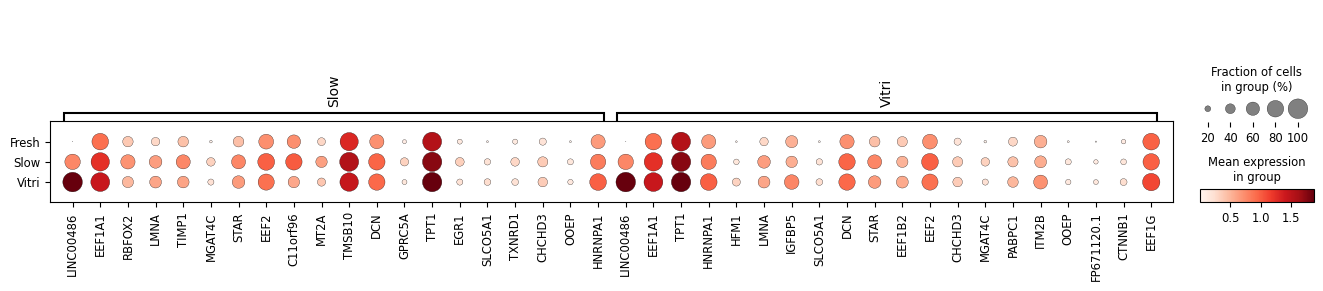

/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:811: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


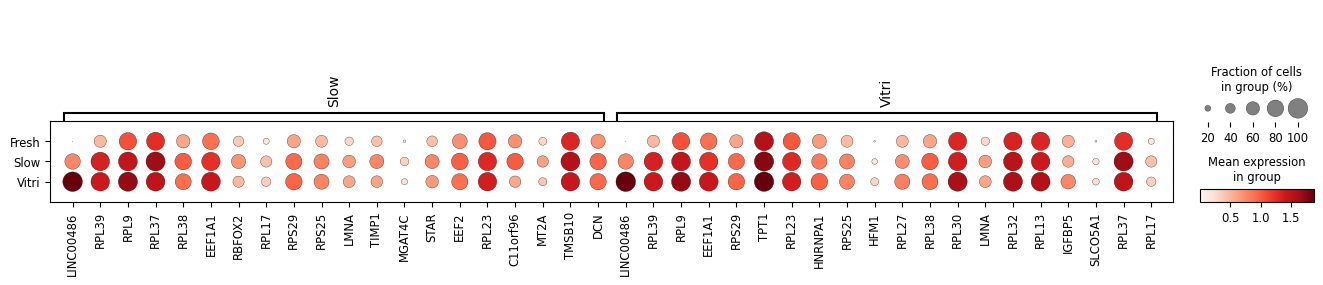

In [49]:
ref = 'Fresh'
markers = pd.read_csv(f'batch_markers_ref{ref}.csv')
markers = markers[(markers['logfoldchanges'] > 0.25)&(markers['pvals_adj']<0.05)]
markers = markers.sort_values('scores', ascending=False)
markers_sub = markers[(~markers['names'].str.contains('MT-'))&(~markers['names'].str.contains('RPS|RPL'))]
markerdict = {k: v[:20] for k, v in markers_sub.groupby('group')['names']}
sc.pl.dotplot(adata, markerdict, groupby='batch', use_raw=False, save=f'batch_markers_ref{ref}_wo_ribo.svg')
markers_sub = markers[~markers['names'].str.contains('MT-')]
markerdict = {k: v[:20] for k, v in markers_sub.groupby('group')['names']}
sc.pl.dotplot(adata, markerdict, groupby='batch', use_raw=False, save=f'batch_markers_ref{ref}_w_ribo.svg')

In [55]:
sc.tl.rank_genes_groups(adata, 'batch', method='wilcoxon', reference='Fresh', pts=True, use_raw=False, genes=['TIMP1', 'DCN', 'THBS1', 'LUM'])
markers = sc.get.rank_genes_groups_df(adata, group=None, pval_cutoff=0.05)
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group
0,Slow,LINC00486,187.345627,8.147816,0.0,0.0,0.728797
1,Slow,RPL39,175.196396,2.166438,0.0,0.0,0.927679
2,Slow,MT-ND3,132.073898,1.368564,0.0,0.0,0.947419
3,Slow,MT-ND2,123.846100,1.362599,0.0,0.0,0.902502
4,Slow,MT-CYB,114.647476,0.907558,0.0,0.0,0.988252
...,...,...,...,...,...,...,...
13309,Vitri,RPS27,-113.872406,-0.960112,0.0,0.0,0.949357
13310,Vitri,RPS18,-114.890472,-0.970032,0.0,0.0,0.980588
13311,Vitri,RPS5,-119.831512,-1.471970,0.0,0.0,0.599840
13312,Vitri,B2M,-122.999268,-1.401309,0.0,0.0,0.654258


/tmp/ipykernel_6969/3488225004.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out = venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups, set_colors=('red', 'green'))


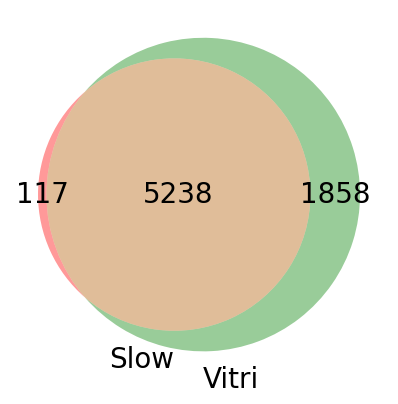

/tmp/ipykernel_6969/3488225004.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out = venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups, set_colors=('red', 'green'))


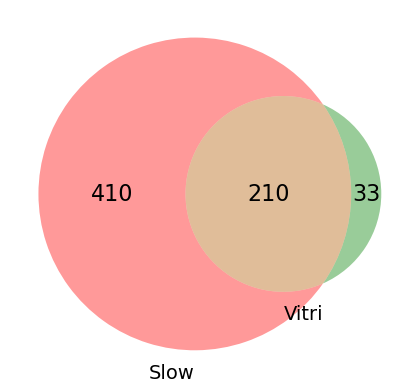

<Figure size 640x480 with 0 Axes>

In [13]:
from matplotlib_venn import venn2, venn3
dfs = []
for ref in ['Fresh', 'Slow', 'Vitri']:
    df = pd.read_csv(f'batch_markers_ref{ref}.csv')
    df = df[(df['pvals_adj']<0.05)].sort_values('logfoldchanges', ascending=False)
    df['ref'] = ref
    dfs.append(df)
df_full = pd.concat(dfs)

# Group the DataFrame by the 'group' column and get the unique genes in each group
df = df_full[df_full['ref']=='Fresh']
df = df[(df['logfoldchanges'] < 0.25)]
grouped_genes = df.groupby('group')['names'].unique()
groups = grouped_genes.index
# Create a Venn diagram based on the number of gene intersections
if len(grouped_genes) == 2:
    out = venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups, set_colors=('red', 'green'))
    for text in out.set_labels:
        text.set_fontsize(20)
    for text in out.subset_labels:
        text.set_fontsize(20)
elif len(grouped_genes) == 3:
    out = venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups, set_colors=('blue', 'red', 'green'), fontsize=12)
    for text in out.set_labels:
        text.set_fontsize(20)
    for text in out.subset_labels:
        text.set_fontsize(20)
# Display the Venn diagram
plt.show()
plt.savefig(f'venn_Fresh_as_ref_up.pdf')

# Group the DataFrame by the 'ref' column and get the unique genes in each group
df = df_full[df_full['ref']=='Fresh']
df = df[(df['logfoldchanges'] > 0.25)]
grouped_genes = df.groupby('group')['names'].unique()
groups = grouped_genes.index
# Create a Venn diagram based on the number of gene intersections
if len(grouped_genes) == 2:
    out = venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups, set_colors=('red', 'green'))
    for text in out.set_labels:
        text.set_fontsize(14)
    for text in out.subset_labels:
        text.set_fontsize(16)
elif len(grouped_genes) == 3:
    out = venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups, set_colors=('blue', 'red', 'green'), fontsize=12)
    for text in out.set_labels:
        text.set_fontsize(14)
    for text in out.subset_labels:
        text.set_fontsize(16)
# Display the Venn diagram
plt.show()
plt.savefig(f'venn_Fresh_as_ref_down.pdf')

Cell type: ST


/tmp/ipykernel_6969/1775763112.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups))


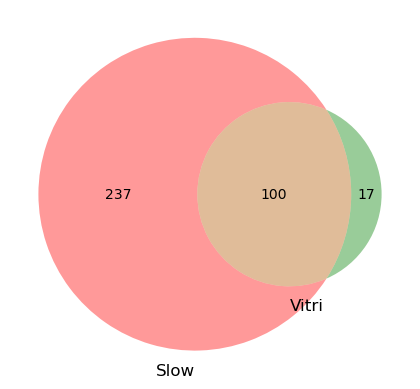

Cell type: ST_SM


/tmp/ipykernel_6969/1775763112.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups))


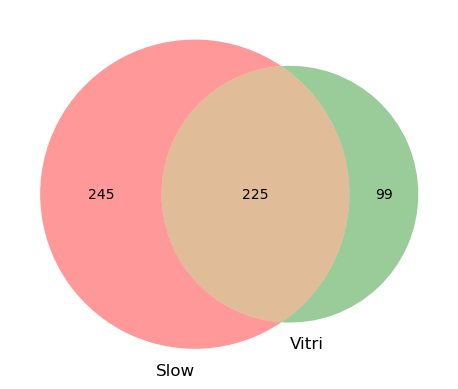

Cell type: ENDO_SM


/tmp/ipykernel_6969/1775763112.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups))


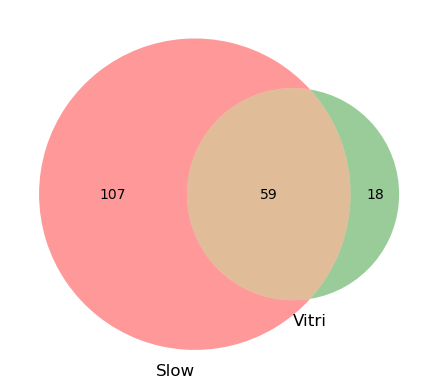

Cell type: FIB


/tmp/ipykernel_6969/1775763112.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups))


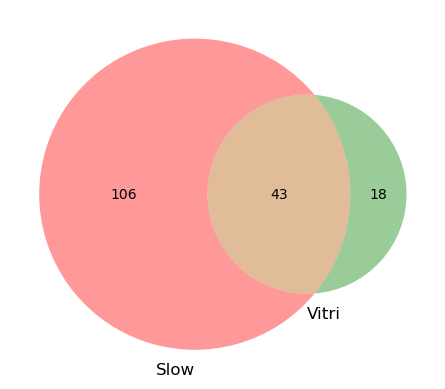

Cell type: B_Plasma


/tmp/ipykernel_6969/1775763112.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups))


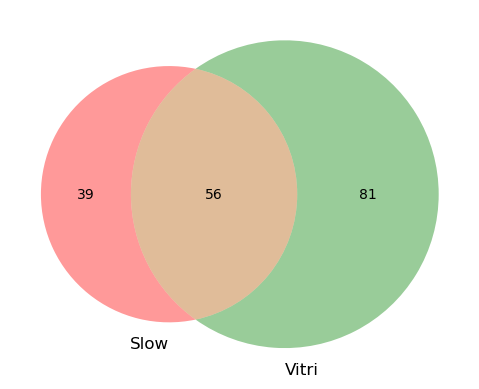

Cell type: O


/tmp/ipykernel_6969/1775763112.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups))


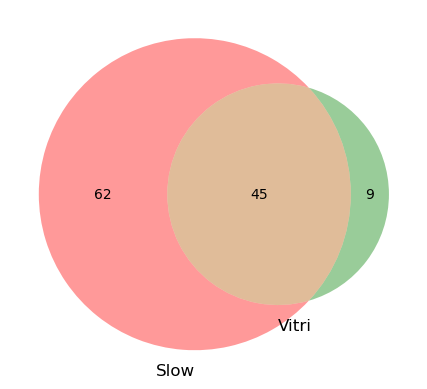

Cell type: ST_LIP


/tmp/ipykernel_6969/1775763112.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups))


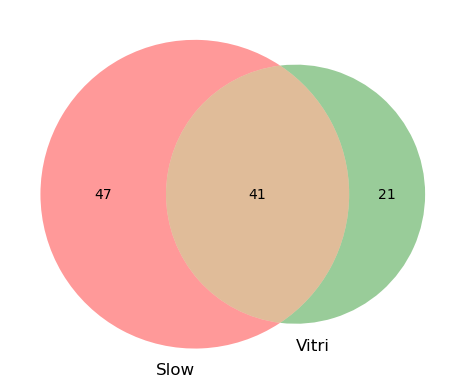

Cell type: ERY_ENDO


/tmp/ipykernel_6969/1775763112.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups))


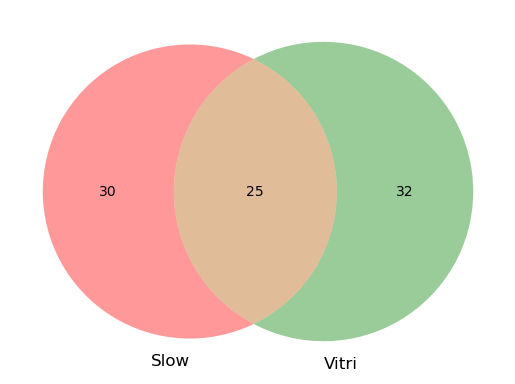

<Figure size 640x480 with 0 Axes>

In [15]:
for ct in adata.obs['annot_no_marker'].unique():
    df = pd.read_csv(f'{ct}_markers_refFresh.csv')
    print('Cell type:', ct)
    df = df[(df['logfoldchanges'] > 0.5)&(df['pvals_adj']<0.05)]
    grouped_genes = df.groupby('group')['names'].unique()
    groups = grouped_genes.index
    # Create a Venn diagram based on the number of gene intersections
    if len(grouped_genes) == 2:
        print(venn2([set(grouped_genes[0]), set(grouped_genes[1])], set_labels=groups))
        for text in out.set_labels:
            text.set_fontsize(20)
        for text in out.subset_labels:
            text.set_fontsize(20)
    elif len(grouped_genes) == 3:
        print(venn3([set(grouped_genes[0]), set(grouped_genes[1]), set(grouped_genes[2])], set_labels=groups))
        for text in out.set_labels:
            text.set_fontsize(20)
        for text in out.subset_labels:
            text.set_fontsize(20)
    # Display the Venn diagram
    plt.show()
    plt.savefig(f'venn_{ct}.svg')

In [70]:
cts = {}
for ct in adata.obs['annot_no_marker'].unique():
    df = pd.read_csv(f'{ct}_markers_refFresh.csv')
    df = df[(df['logfoldchanges'] > 0.25)&(df['pvals_adj']<0.05)]
    df['annot_no_marker'] = ct
    cts[ct] = df
total_markers = pd.concat(cts.values())
grouped_genes = total_markers.groupby(['annot_no_marker', 'group']).apply(lambda x: len(x['names'])).reset_index().pivot(index='annot_no_marker', columns='group', values=0)
grouped_genes

group,Slow,Vitri
annot_no_marker,,
B_Plasma,106,159
ENDO_SM,218,107
ERY_ENDO,60,65
FIB,191,81
O,125,68
ST,445,156
ST_LIP,111,82
ST_SM,565,364


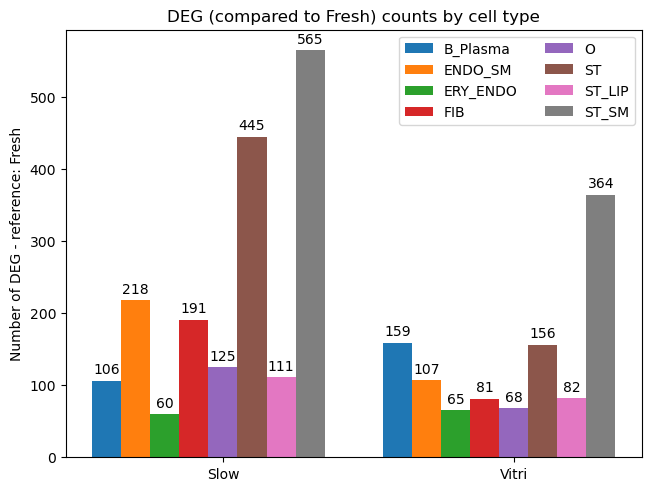

In [73]:
grouped_genes_dict = {i: row.values for i, row in grouped_genes.iterrows()}
x = np.arange(len(grouped_genes.columns))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in grouped_genes_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of DEG - reference: Fresh')
ax.set_title('DEG (compared to Fresh) counts by cell type')
ax.set_xticks(x + width*(grouped_genes.shape[0]//2), grouped_genes.columns)
ax.legend(loc='upper right', ncols=2)
# ax.set_ylim(0, 250)

plt.show()

In [91]:
import seaborn as sns 
df = sns.load_dataset("tips")
df

/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  output = repr(obj)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## DEG dotplot

In [20]:
reffresh = pd.read_csv('/home/chrissy1/spatial/stomics/ovary_froz/redo/seurat/bin50_processed/deg/batch_markers_refFresh.csv')
reffresh = reffresh[(reffresh['pvals_adj']<0.05)&(reffresh['logfoldchanges']>0.25)]
reffresh.groupby('group').apply(lambda x: x.sort_values('logfoldchanges', ascending=False).head(20))

Unnamed: 0  group       names      scores  logfoldchanges  \
group                                                                   
Slow  0              0   Slow   LINC00486  187.345630        8.147816   
      220          220   Slow        PCP4    9.322354        3.923648   
      113          113   Slow  FP236383.1   17.456675        3.339634   
      313          313   Slow     PLA2G2A    6.134588        3.264397   
      17            17   Slow      MGAT4C   69.662080        2.889683   
      31            31   Slow     SLCO5A1   47.048485        2.807800   
      58            58   Slow  FP671120.1   29.258072        2.744984   
      154          154   Slow  ADGRL3-AS1   13.164079        2.679196   
      481          481   Slow  AP005482.1    3.846914        2.650272   
      39            39   Slow        HFM1   38.981000        2.606386   
      389          389   Slow  AC116049.2    4.934631        2.556827   
      451          451   Slow  AC011468.3    4.085944        2.508079   
      607          607   Slow  AL139393.2    2.891330        2.476721   
      35            35   Slow        OOEP   42.589480        2.392631   
      294          294   Slow        AQP3    6.583107        2.363735   
      413          413   Slow      CNKSR2    4.547789        2.229727   
      411          411   Slow      NKX3-1    4.554174        2.222107   
      1              1   Slow       RPL39  175.196400        2.166438   
      95            95   Slow        MT1A   20.641338        2.163820   
      260          260   Slow  FP671120.4    7.642732        2.121054   
Vitri 5975        5975  Vitri   LINC00486  257.857450       10.411859   
      6043        6043  Vitri  FP236383.1   18.279068        3.786747   
      5987        5987  Vitri        HFM1   70.127550        3.647868   
      6138        6138  Vitri        PCP4    5.408656        3.316372   
      6016        6016  Vitri  FP671120.1   34.764122        3.220534   
      5996        5996  Vitri     SLCO5A1   51.868443        3.095535   
      5976        5976  Vitri       RPL39  178.852500        2.297407   
      6008        6008  Vitri      MGAT4C   38.988308        2.280324   
      6188        6188  Vitri  AC011468.3    3.254628        2.253649   
      6232        6232  Vitri     PLA2G2A    2.490022        2.231899   
      6015        6015  Vitri        OOEP   35.135918        2.230494   
      6066        6066  Vitri       TFPI2   12.169251        2.063858   
      6176        6176  Vitri      SECTM1    3.733844        1.988139   
      6161        6161  Vitri        AQP3    4.202062        1.967307   
      6042        6042  Vitri      LHFPL3   18.311808        1.949540   
      6100        6100  Vitri       HMGA1    7.921257        1.939838   
      6102        6102  Vitri          C3    7.901536        1.927103   
      6228        6228  Vitri   TNFAIP8L3    2.548458        1.919846   
      6195        6195  Vitri      NKX3-1    2.995296        1.918091   
      6146        6146  Vitri       NACA2    4.762424        1.884331   

                    pvals      pvals_adj  pct_nz_group  
group                                                   
Slow  0      0.000000e+00   0.000000e+00      0.728797  
      220    1.137874e-20   2.065178e-19      0.039043  
      113    3.062580e-68   1.577572e-66      0.076666  
      313    8.538038e-10   9.035463e-09      0.026880  
      17     0.000000e+00   0.000000e+00      0.329920  
      31     0.000000e+00   0.000000e+00      0.223207  
      58    3.544964e-188  5.045178e-186      0.137872  
      154    1.412500e-39   4.290334e-38      0.060660  
      481    1.196151e-04   7.623668e-04      0.018386  
      39     0.000000e+00   0.000000e+00      0.187571  
      389    8.030253e-07   6.594743e-06      0.023212  
      451    4.389790e-05   2.967730e-04      0.019259  
      607    3.836152e-03   1.931015e-02      0.013757  
      35     0.000000e+00   0.000000e+00      0.209232  
      294    4.607195e-11   5.302